# Projeto Final 
## Ciência de dados

1. Para começar o projeto, vou ler os arquivos das bases de dados para analisa-las e ver se existem registros vazios e como estão os tipos de dados e se correspondem com as intenções das colunas.
- Depois de observar os dados, fica claro que os dados estão segregados e para conseguir lidar com a base e realizar os treinamentos, ficará mais fácil juntar todas as bases em uma só


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [93]:
df_contract = pd.read_csv('./datasets/contract.csv')
df_internet = pd.read_csv('./datasets/internet.csv')
df_personal = pd.read_csv('./datasets/personal.csv')
df_phone = pd.read_csv('./datasets/phone.csv')

In [94]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [95]:
df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'])


In [96]:
df_contract['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [97]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [98]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [99]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


- Com o método de joins, irei juntar as bases por customerID. Assim teremos observações unificadas que se referem ao mesmo cliente.

In [100]:
df_merged = df_contract.merge(df_personal, on="customerID", how="left")

In [101]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 660.4+ KB


In [102]:
# De acordo com os dados que olhei, eu com certeza vou ter que lidar com valores nulos e pra isso, vou preenche-los com esse método:
def fill_multiple_lines_nulls(df, series, column, a_value, b_value='No'):
    a_ratio = df[column].value_counts(normalize=True).get(a_value, 0)
    # no_ratio = df[column].value_counts(normalize=True).get('No', 0)

    n_missing = series.isnull().sum()
    n_a = int(round(n_missing * a_ratio))
    n_b = n_missing - n_a

    fill_values = np.array([a_value] * n_a + [b_value] * n_b)
    np.random.shuffle(fill_values)
    series.loc[series.isnull()] = fill_values

    return series


In [103]:
df_merged = df_merged.merge(df_internet, on='customerID', how='left')

In [104]:
df_merged['InternetService'].value_counts(normalize=True)

InternetService
Fiber optic    0.561175
DSL            0.438825
Name: proportion, dtype: float64

In [105]:
print("Para as colunas de serviços de internet: \n")

for i, col in enumerate(df_internet.columns):
    if i == 0:
        continue
    col_values = df_merged[col].isnull().sum()
    print(f"{col}, tem {col_values} registros nulos?")

Para as colunas de serviços de internet: 

InternetService, tem 1526 registros nulos?
OnlineSecurity, tem 1526 registros nulos?
OnlineBackup, tem 1526 registros nulos?
DeviceProtection, tem 1526 registros nulos?
TechSupport, tem 1526 registros nulos?
StreamingTV, tem 1526 registros nulos?
StreamingMovies, tem 1526 registros nulos?


In [106]:
for i, col in enumerate(df_internet.columns):
    if i == 0:
        continue
    print(i, col)
    col_values = df_merged[col].value_counts().index
    df_merged[col] = fill_multiple_lines_nulls(df_merged, df_merged[col], col, col_values[0], col_values[1])


1 InternetService
2 OnlineSecurity
3 OnlineBackup
4 DeviceProtection
5 TechSupport
6 StreamingTV
7 StreamingMovies


C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\1639362679.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[series.isnull()] = fill_values
C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\1639362679.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[series.isnull()] = fill_values
C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\1639362679.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Verificando se ainda existem valores nulos depois dos merges e fillings

In [107]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Mergeando base de dados de telefone de cada cliente:

In [108]:
df_merged = df_merged.merge(df_phone, on='customerID', how='left')

In [109]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

In [110]:
df_merged['MultipleLines'].value_counts()

MultipleLines
No     3390
Yes    2971
Name: count, dtype: int64

In [111]:
df_merged['MultipleLines'].value_counts(normalize=True)

MultipleLines
No     0.532935
Yes    0.467065
Name: proportion, dtype: float64

Aqui nessa coluna, temos uma divisão bem equilibrada entre clientes com mais de uma linha e clientes com uma linha só. Mas eu aplicarei o mesmo algoritmo para manter o mais fiel possível no preenchimento de valores nulos

In [112]:
for i, col in enumerate(df_phone.columns):
    if i == 0:
        continue
    print(i, col)
    col_values = df_merged[col].value_counts().index
    print(col_values)
    df_merged[col] = fill_multiple_lines_nulls(df_merged, df_merged[col], col, col_values[0], col_values[1])


1 MultipleLines
Index(['No', 'Yes'], dtype='object', name='MultipleLines')


C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\1639362679.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[series.isnull()] = fill_values


In [113]:
df_merged['MultipleLines'].value_counts()

MultipleLines
No     3753
Yes    3290
Name: count, dtype: int64

In [114]:
df_merged['MultipleLines'].value_counts(normalize=True)

MultipleLines
No     0.53287
Yes    0.46713
Name: proportion, dtype: float64

Agora, vou definir a característica objetivo para o treinamento do modelo de classificação de clientes. Para encontrar ela, eu vou utilizar a coluna **EndDate**. Pois ela simboliza o término do contrato de um cliente. E pelo que já investiguei dos valores nessa coluna, eles podem ser uma data ou uma string "No". Então posso usar isso para criar uma lógica e criar um objetivo de forma binária. Sendo um valor de data, correspondendo a um cliente que deu churn no serviço. 

In [115]:
df_merged['Churn'] = df_merged['EndDate'].apply(lambda x: 0 if x == 'No' else 1 )

In [116]:
df_merged.sample(5)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Churn
3928,4647-MUZON,2018-08-01,No,Month-to-month,Yes,Credit card (automatic),95.95,1745.5,Female,0,...,No,Fiber optic,No,No,Yes,No,Yes,Yes,No,0
6245,4759-PXTAN,2015-03-01,No,One year,Yes,Electronic check,80.10,4693.2,Female,0,...,No,DSL,No,Yes,No,Yes,Yes,Yes,Yes,0
6787,3174-RKMOW,2017-03-01,No,Month-to-month,Yes,Electronic check,109.95,3782.4,Male,0,...,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes,0
1281,9531-NSBMR,2017-02-01,No,One year,Yes,Bank transfer (automatic),19.25,679.8,Female,0,...,No,DSL,No,Yes,No,Yes,Yes,Yes,No,0
427,8734-DKSTZ,2019-04-01,No,Month-to-month,No,Electronic check,85.95,858.6,Female,0,...,Yes,Fiber optic,No,No,No,No,No,Yes,Yes,0


2. Depois de identificar os possíveis problemas, é hora de resolve-los e preparar os dados para AED. Caso contrário, os resultados na parte estatística não serão apurados.

In [117]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

In [118]:
# Convertendo valores para seus tipos certos
df_merged['EndDate_dt'] = pd.to_datetime(df_merged['EndDate'], errors='coerce')
df_merged['TotalCharges'] = pd.to_numeric(df_merged['TotalCharges'], errors='coerce')

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\7359116.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged['EndDate_dt'] = pd.to_datetime(df_merged['EndDate'], errors='coerce')


In [119]:
df_merged['EndDate_dt'].head()

0          NaT
1          NaT
2   2019-12-01
3          NaT
4   2019-11-01
Name: EndDate_dt, dtype: datetime64[ns]

In [183]:
df_merged['DaysWithService'] = np.where(
    df_merged['EndDate'] == 'No',
    0,
    (df_merged['EndDate_dt'] - df_merged['BeginDate']).dt.days
)

df_merged['MonthsWithService'] = np.where(
    df_merged['EndDate'] == 'No',
    0,
    (df_merged['EndDate_dt'] - df_merged['BeginDate']).dt.days / 30
)


In [184]:
# Convertendo DaysWithService e MonthsWithService para int
df_merged['DaysWithService'] = df_merged['DaysWithService'].astype(int)
df_merged['MonthsWithService'] = df_merged['MonthsWithService'].astype(int)

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\2739077242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churned['MonthsWithServiceBinned'] = pd.cut(df_churned['MonthsWithService'], bins=bins, labels=labels, right=False)


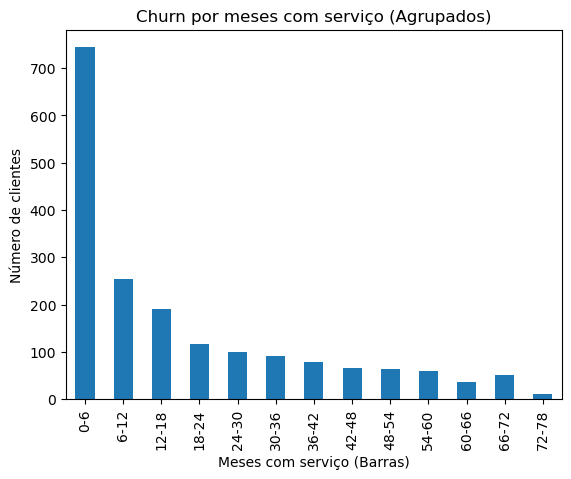

In [121]:
bins = range(0, int(df_merged['MonthsWithService'].max()) + 6, 6)
labels = [f"{b}-{b+6}" for b in bins[:-1]]

df_churned = df_merged[df_merged['Churn'] == 1]
df_churned['MonthsWithServiceBinned'] = pd.cut(df_churned['MonthsWithService'], bins=bins, labels=labels, right=False)
df_churned['MonthsWithServiceBinned'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Meses com serviço (Barras)')
plt.ylabel('Número de clientes')
plt.title('Churn por meses com serviço (Agrupados)')
plt.show()

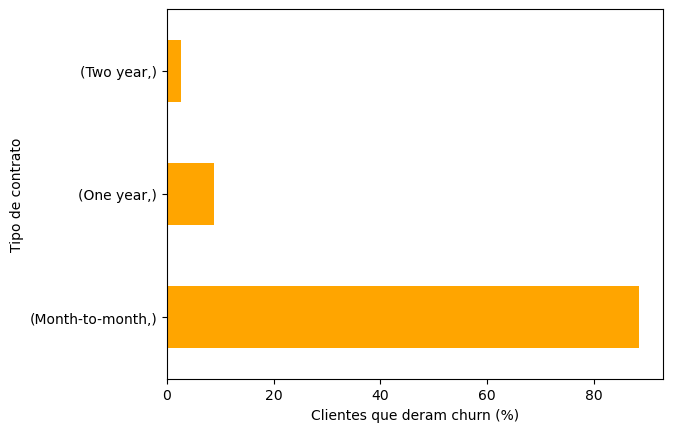

In [122]:
(df_churned[['Type']]
 .value_counts(normalize=True)
 .mul(100)
 .plot(kind='barh', color='orange'))

plt.xlabel('Clientes que deram churn (%)')
plt.ylabel('Tipo de contrato')
plt.show()

- É bem interessante notar que o tempo que os clientes permanecem com o serviço influência na taxa de churn. Pois o número de clientes que cancelam a assinatura nos primeiros 6 meses (+/- 750), é praticamente o **triplo** do número de clientes que cancelam depois de 6 meses (+/- 250).
- Isso se trazduz ao vermos também que 88% dos clientes que deram churn, pagavam mensalmente. Contratos anuais já tem um número de churn bem mais baixo, ainda mais se forem 2 anos consecutivos.
- Aqui, podemos dizer que focar no atendimento do cliente pode ser uma boa iniciativa para manter o cliente satisfeito no começo de sua experiência vendo que é mais dificil cancelarem depois de 6 meses com o serviço.
- Ou até, fechar pacotes de 1 ano oferecendo desconto para garantir que o cliente permaneça por pelo menos um ano. Vendo que depois de 12 meses, a taxa de churn diminui mais de 3 vezes (200/ 750).

In [125]:
df_merged[['Type', 'MonthlyCharges', 'TotalCharges' ]].value_counts(normalize=True)

Type            MonthlyCharges  TotalCharges
Month-to-month  20.20           20.20           0.001422
                19.75           19.75           0.001280
                19.90           19.90           0.001138
                20.05           20.05           0.001138
                19.55           19.55           0.000995
                                                  ...   
                83.25           1611.15         0.000142
                                308.05          0.000142
                83.20           2032.30         0.000142
                                1130.00         0.000142
Two year        118.75          8672.45         0.000142
Name: proportion, Length: 6784, dtype: float64

In [178]:
df_churned[['InternetService', 'MonthlyCharges', 'TotalCharges' ]].value_counts(normalize=True)

InternetService  MonthlyCharges  TotalCharges
DSL              45.30           45.30           0.002675
Fiber optic      75.30           75.30           0.002140
                 69.60           69.60           0.002140
                 69.65           69.65           0.002140
                 69.55           69.55           0.001605
                                                   ...   
                 70.70           141.45          0.000535
                                 140.70          0.000535
                 70.65           142.35          0.000535
                                 70.65           0.000535
                 118.35          7804.15         0.000535
Name: proportion, Length: 1774, dtype: float64

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\1477016633.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churned['MonthlyChargesRanges'] = pd.cut(df_churned['MonthlyCharges'], bins=bins, labels=labels, right=False)


Text(0, 0.5, 'Número de clientes')

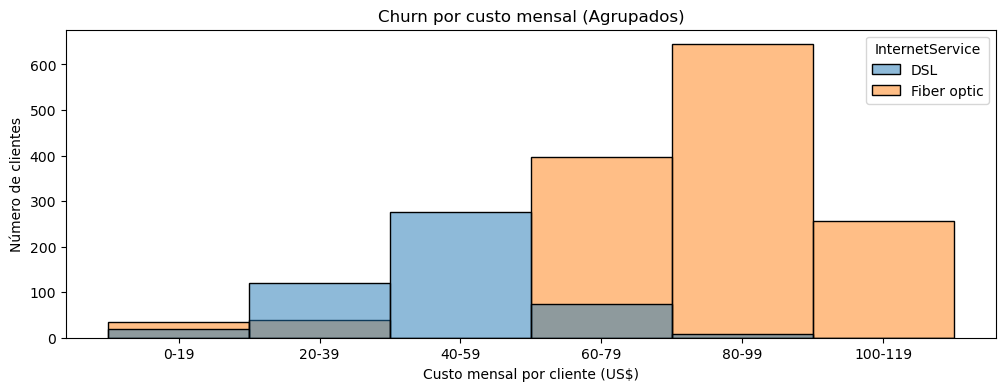

In [180]:
bins = range(0, int(df_merged['MonthlyCharges'].max()) + 20, 20)
labels = [f"{b}-{b+19}" for b in bins[:-1]]

df_churned['MonthlyChargesRanges'] = pd.cut(df_churned['MonthlyCharges'], bins=bins, labels=labels, right=False)
df_churned['MonthlyChargesRanges'].value_counts().sort_index()

plt.figure(figsize=(12,4))
sns.histplot(data=df_churned, x='MonthlyChargesRanges', hue='InternetService')
plt.title('Churn por custo mensal (Agrupados)')
plt.xlabel('Custo mensal por cliente (US$)')
plt.ylabel('Número de clientes')


In [175]:
bins = range(0, int(df_merged['TotalCharges'].max()) + 1000, 1000)
labels = [f"{int(b/1000)}-{round((b+999)/1000, 2)}K" for b in bins[:-1]]

df_churned['TotalChargesRanges'] = pd.cut(df_churned['TotalCharges'], bins=bins, labels=labels, right=False)
df_churned['TotalChargesRanges'].value_counts().sort_index()

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\324367924.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churned['TotalChargesRanges'] = pd.cut(df_churned['TotalCharges'], bins=bins, labels=labels, right=False)


TotalChargesRanges
0-1.0K    1070
1-2.0K     269
2-3.0K     180
3-4.0K     107
4-5.0K      86
5-6.0K      69
6-7.0K      55
7-8.0K      30
8-9.0K       3
Name: count, dtype: int64

Text(0, 0.5, 'Número de clientes')

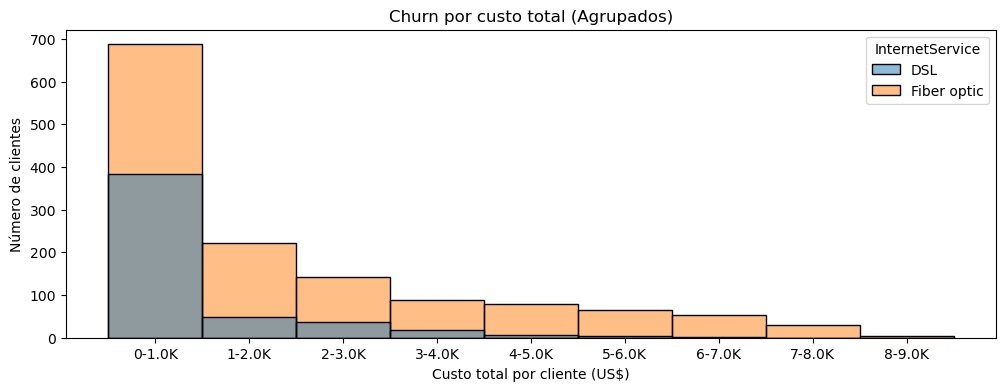

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data=df_churned, x='TotalChargesRanges', hue='InternetService')
plt.title('Churn por custo total (Agrupados)')
plt.xlabel('Custo total por cliente (US$)')
plt.ylabel('Número de clientes')

Text(0, 0.5, 'Número de meses com serviço')

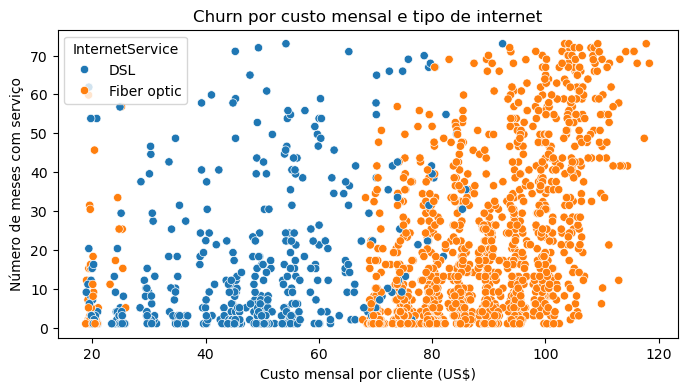

In [211]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_churned, y='MonthsWithService', x='MonthlyCharges', hue='InternetService')
plt.title('Churn por custo mensal e tipo de internet')
plt.xlabel('Custo mensal por cliente (US$)')
plt.ylabel('Número de meses com serviço')

Olhando para custos mensais e totais, vemos um padrão de churn para clientes que gastam mais váriavelmente com planos incluindo Fibra Óptica, tendem a gastar mais e consequentemente dar churn.

Já clientes com o serviço de internet DSL, parecem ter um custo mensal mais baixo e previsível. Tendem a dar menos churn.

Em ambos os casos, de novo, o tempo de assinatura influência muito. Porém, no caso de fibra ótica, mesmo com mais tempo de serviço a taxa de churn é grande e mais impactante.

In [ ]:
columns_demographics = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents']

In [230]:
for col in columns_demographics:
    print(f"\n{col}:")
    print(pd.crosstab(df_merged[col], df_merged['Churn'], normalize='index'))


gender:
Churn          0         1
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

SeniorCitizen:
Churn                 0         1
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813

Partner:
Churn           0         1
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

Dependents:
Churn              0         1
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


In [232]:
columns_services = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV']

for col in columns_services:
    print(f"\n{col}:")
    print(pd.crosstab(df_merged[col], df_merged['Churn'], normalize='index'))


OnlineSecurity:
Churn                  0         1
OnlineSecurity                    
No              0.659651  0.340349
Yes             0.864571  0.135429

OnlineBackup:
Churn                0         1
OnlineBackup                    
No            0.669203  0.330797
Yes           0.817801  0.182199

DeviceProtection:
Churn                    0         1
DeviceProtection                    
No                0.678309  0.321691
Yes               0.806598  0.193402

TechSupport:
Churn               0         1
TechSupport                    
No           0.657420  0.342580
Yes          0.865849  0.134151

StreamingTV:
Churn               0         1
StreamingTV                    
No           0.722609  0.277391
Yes          0.747106  0.252894


C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\439311464.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


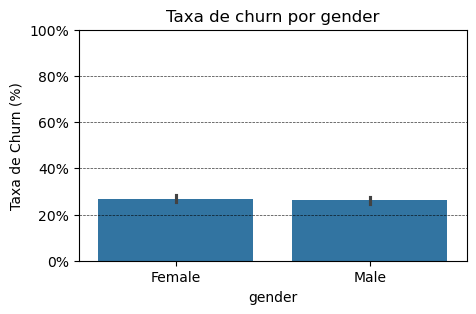

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\439311464.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


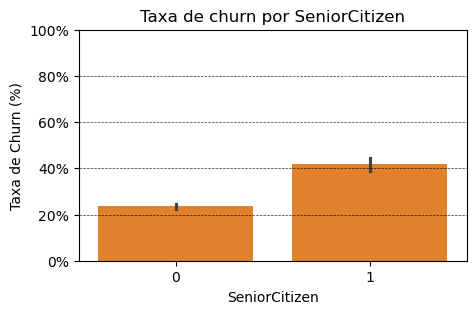

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\439311464.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


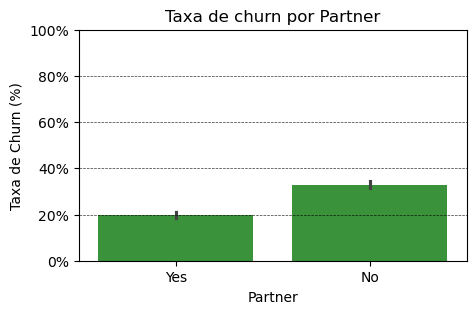

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\439311464.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


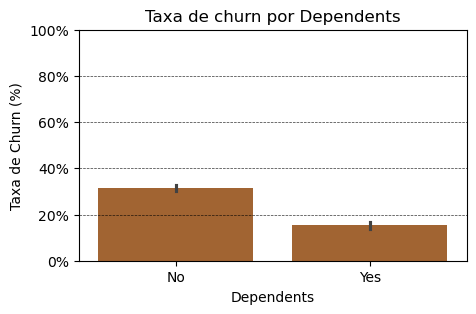

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\439311464.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


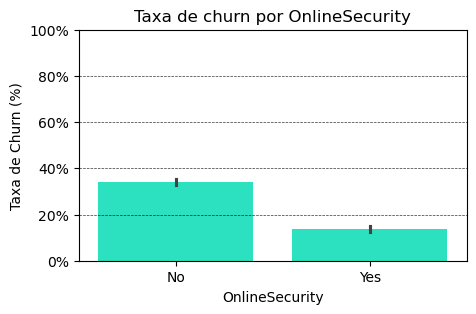

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\439311464.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


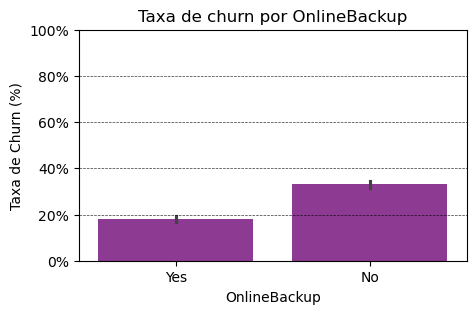

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\439311464.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


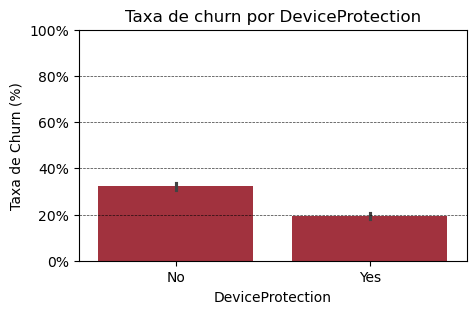

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\439311464.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


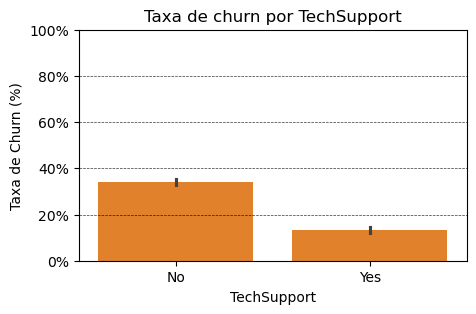

C:\Users\Henrique Yasuo\AppData\Local\Temp\ipykernel_25908\439311464.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])


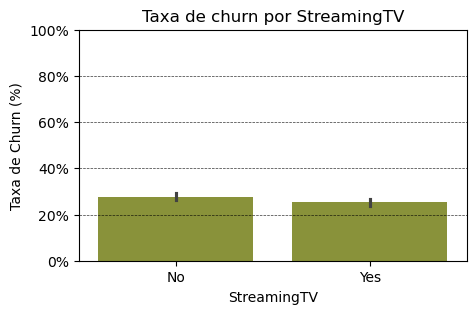

In [244]:
merged_columns = columns_demographics + columns_services
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', "#b4621f", "#0effd3", "#9a2ca0", "#b41f30", '#ff7f0e', "#94a02c"]   # Example color list

for i, col in enumerate(merged_columns):
    plt.figure(figsize=(5, 3))
    ax = sns.barplot(
        x=col,
        hue=col,
        legend=False,
        y='Churn',
        data=df_merged,
        estimator=lambda x: np.mean(x) * 100,
        palette=[colors[i % len(colors)] for _ in df_merged[col].unique()]
    )
    plt.title(f'Taxa de churn por {col}')
    plt.ylabel('Taxa de Churn (%)')
    plt.ylim(0, 100)
    ax.set_yticklabels([f'{int(t)}%' for t in ax.get_yticks()])
    
    for y in ax.get_yticks():
        plt.axhline(y, color='black', linestyle='--', linewidth=0.5, alpha=0.8)
    
    plt.show()

3. Temos uma idéia melhor do que estamos lidando agora, depois de observar os dados e analisá-los, é hora de achar balacea-los para o treinamento. Minha idéia é utilizar métodos como OHE, escalonamento ou algum outro que se molde melhor com os dados atuais.

4. Além de escalonar e balancear os dados, também precisamos dividir os conjuntos de teste e de treinamento.

5. Após padronizar, balancear e dvidir os dado, é hora de começar o treinamento dos modelos! Para isso, é de entender que o problema consiste em definir quais usuários tem chances em dar churn e quais não. Então, temos um problema de classificação. Para isso podemos treinar um modelo de Regressão Logística para obtermos resultados interessantes. A métrica que podemos usar, é a MSE e MAE